In [150]:
pip install colorama

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, precision_recall_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, layers
from colorama import Fore, Back, Style

sns.set_style('dark')

In [152]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [153]:
df = df.drop('id', axis=1)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [155]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


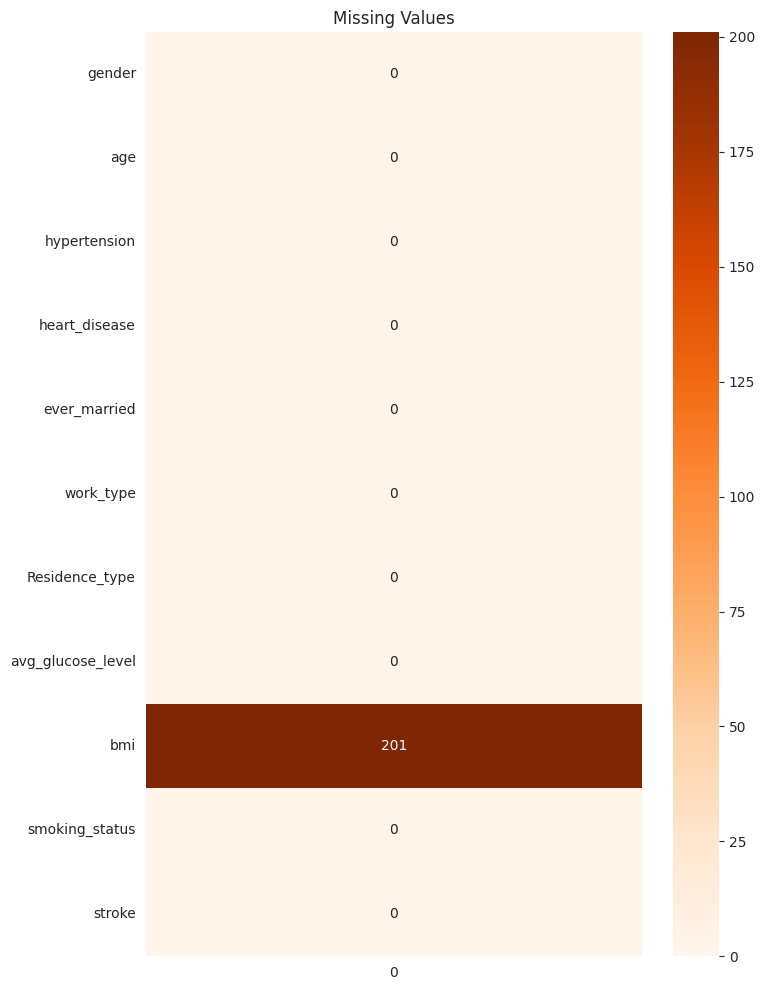

In [156]:
plt.figure(figsize=(8, 12), dpi=100)
plt.title('Missing Values')
ax = sns.heatmap(df.isna().sum().to_frame(), annot=True, fmt='d', cmap='Oranges')
plt.show()

In [157]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [158]:
df.drop(df[df['gender'] == 'Other'].index, inplace=True)

<ipython-input-159-ca0b05125291>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap='RdBu', ax=ax)


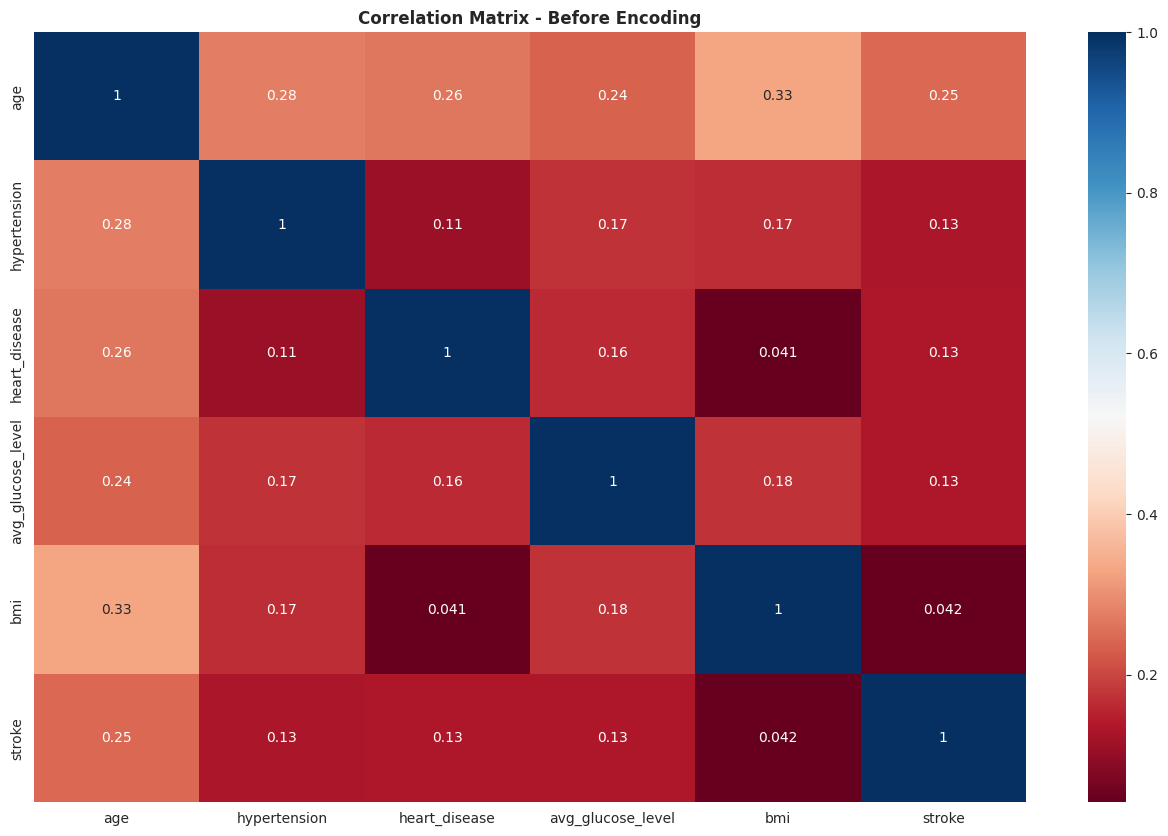

In [159]:
plt.figure(figsize = (16,10), dpi=100)
ax = plt.axes()
sns.heatmap(df.corr(), annot = True, cmap='RdBu', ax=ax)
ax.set_title('Correlation Matrix - Before Encoding', weight='bold')
plt.show()

In [160]:
df.gender = df.gender.replace({'Male':0,'Female':1}).astype(np.uint8)
df.Residence_type = df.Residence_type.replace({'Rural':0,'Urban':1}).astype(np.uint8)
df.work_type = df.work_type.replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4}).astype(np.uint8)
df.smoking_status = df.smoking_status.replace({'never smoked':0,'smokes':1,'formerly smoked':2, 'Unknown':3}).astype(np.uint8)
df.ever_married = df.ever_married.replace({'No': 0, 'Yes': 1}).astype(np.uint8)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,2,1
1,1,61.0,0,0,1,1,0,202.21,NaN,0,1
2,0,80.0,0,1,1,0,0,105.92,32.5,0,1
3,1,49.0,0,0,1,0,1,171.23,34.4,1,1
4,1,79.0,1,0,1,1,0,174.12,24.0,0,1


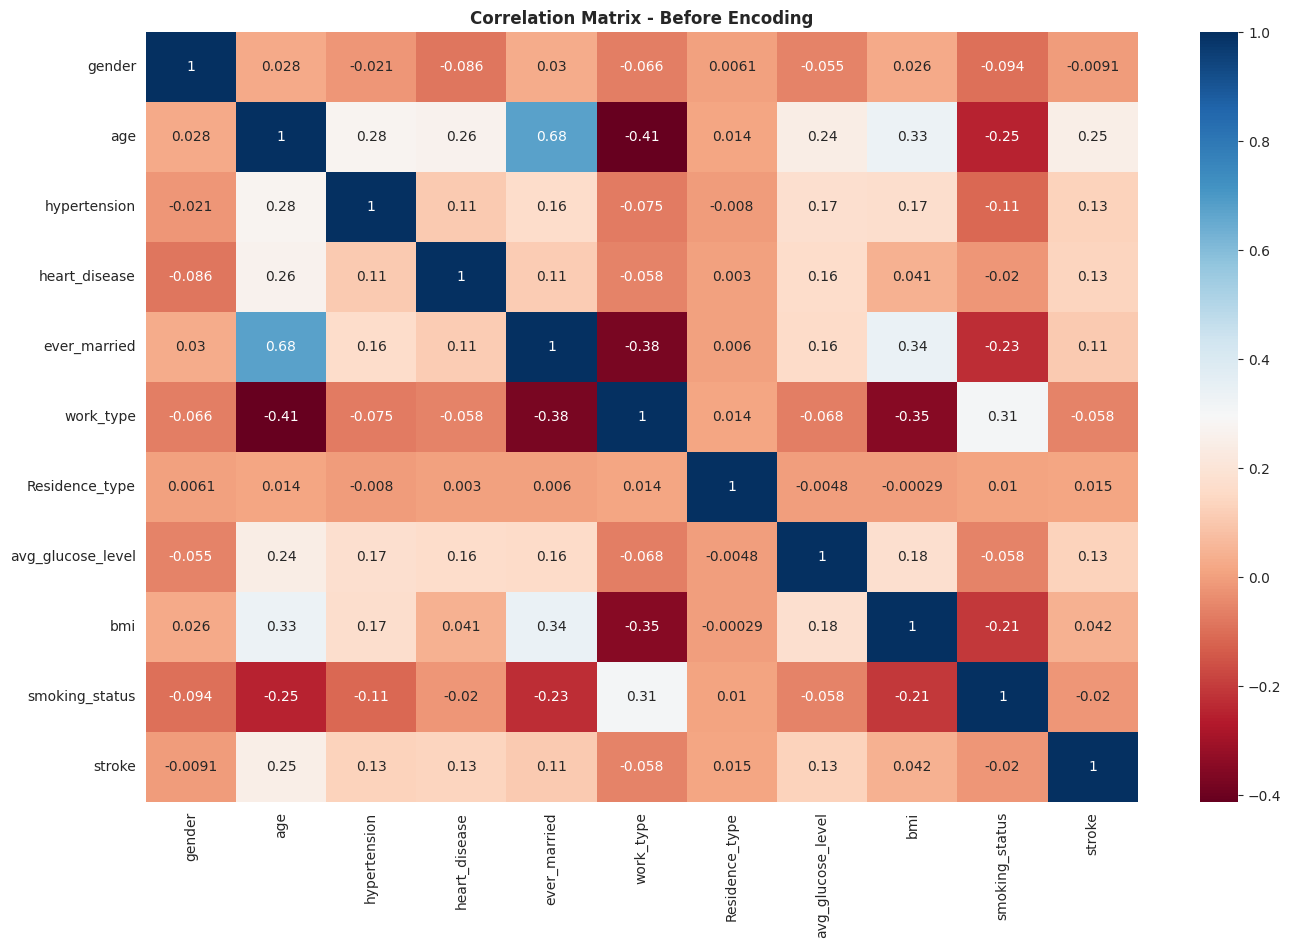

In [161]:
plt.figure(figsize = (16,10), dpi=100)
ax = plt.axes()
sns.heatmap(df.corr(), annot = True, cmap='RdBu', ax=ax)
ax.set_title('Correlation Matrix - Before Encoding', weight='bold')
plt.show()

## 4. **NORMALISASI DAN TRANSFORMASI DATA**

In [162]:
DT_BMI = Pipeline(steps=[('scale', StandardScaler()),
                         ('lr', DecisionTreeRegressor(random_state=42))])

x = df[['age','gender','bmi']].copy()

m = x[x.bmi.isna()]
x = x[~x.bmi.isna()]
y = x.pop('bmi')

DT_BMI.fit(x, y)

pred = pd.Series(DT_BMI.predict(m[['age','gender']]), index=m.index)

df.loc[m.index,'bmi'] = pred

In [163]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [164]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,0.586025,43.229986,0.097475,0.054022,0.656293,0.838129,0.508123,106.140399,28.919686,1.407125,0.048738
std,0.492592,22.613575,0.296633,0.226084,0.474991,1.118746,0.499983,45.285004,7.732060,1.259667,0.215340
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.240000,23.700000,0.000000,0.000000
50%,1.000000,45.000000,0.000000,0.000000,1.000000,0.000000,1.000000,91.880000,28.300000,1.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,114.090000,32.900000,3.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [165]:
upsample = SMOTE()

test_df  = df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi','stroke']].sample(int(df.shape[0]*0.2),random_state=42)
train_df = df.drop(index=test_df.index)

X_test, y_test   = test_df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']], test_df['stroke']
X_train, y_train = train_df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']], train_df['stroke']


X_train, y_train = upsample.fit_resample(X_train, y_train)
upsampled_df = X_train.assign(Stroke = y_train)

X_test, y_test = upsample.fit_resample(X_test, y_test)
up_test_df = X_test.assign(Stroke = y_test)

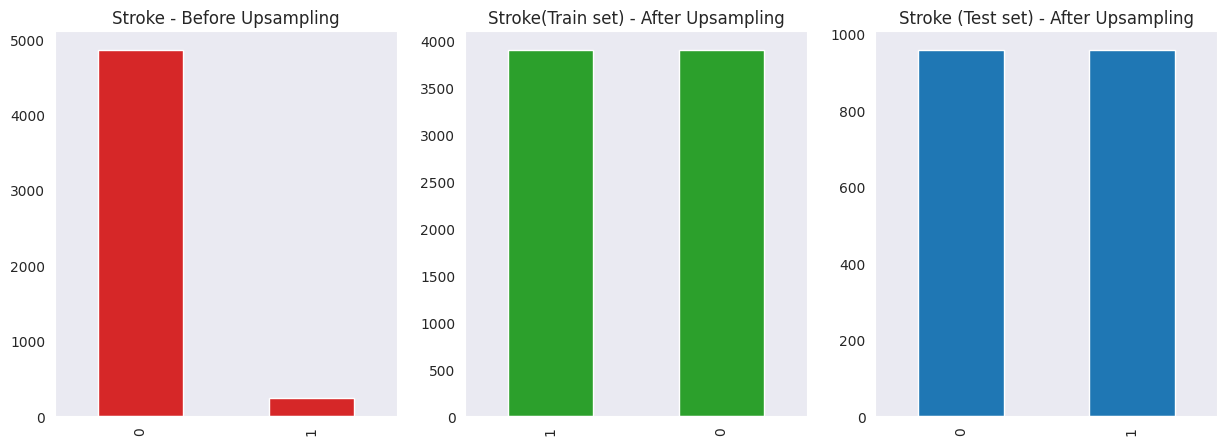

In [166]:
fig, axes = plt.subplots(nrows=1, ncols=3, dpi=100, figsize=(15, 5))

df.stroke.value_counts().plot(kind='bar', color='tab:red', title='Stroke - Before Upsampling', ax=axes[0])
upsampled_df.Stroke.value_counts().plot(kind='bar', color='tab:green', title='Stroke(Train set) - After Upsampling', ax=axes[1])
up_test_df.Stroke.value_counts().plot(kind='bar', color='tab:blue', title='Stroke (Test set) - After Upsampling', ax=axes[2]);

In [170]:
model = Sequential([
    layers.Dense(
        16,
        activation='relu',
        input_shape=(None, 7802, 7)
    ),
    layers.Dense(
        32,
        activation = 'relu'
    ),
    layers.Dense(
        1,
        activation='sigmoid'
    ),
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, None, 7802, 16)    128       
                                                                 
 dense_37 (Dense)            (None, None, 7802, 32)    544       
                                                                 
 dense_38 (Dense)            (None, None, 7802, 1)     33        
                                                                 
Total params: 705 (2.75 KB)
Trainable params: 705 (2.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [173]:
h = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
244/244 [==============================] - 1s 5ms/step - loss: 0.3381 - accuracy: 0.8586 - val_loss: 0.5913 - val_accuracy: 0.7643
Epoch 2/20
244/244 [==============================] - 1s 2ms/step - loss: 0.3438 - accuracy: 0.8512 - val_loss: 0.5853 - val_accuracy: 0.7669
Epoch 3/20
244/244 [==============================] - 1s 3ms/step - loss: 0.3380 - accuracy: 0.8582 - val_loss: 0.6204 - val_accuracy: 0.7727
Epoch 4/20
244/244 [==============================] - 1s 3ms/step - loss: 0.3422 - accuracy: 0.8566 - val_loss: 0.6699 - val_accuracy: 0.7576
Epoch 5/20
244/244 [==============================] - 1s 3ms/step - loss: 0.3459 - accuracy: 0.8531 - val_loss: 0.6013 - val_accuracy: 0.7716
Epoch 6/20
244/244 [==============================] - 1s 2ms/step - loss: 0.3361 - accuracy: 0.8593 - val_loss: 0.6133 - val_accuracy: 0.7795
Epoch 7/20
244/244 [==============================] - 1s 3ms/step - loss: 0.3361 - accuracy: 0.8593 - val_loss: 0.5593 - val_accuracy: 0.7685
Epoch 

Text(0.5, 1.0, 'Training & Validation Acc.')

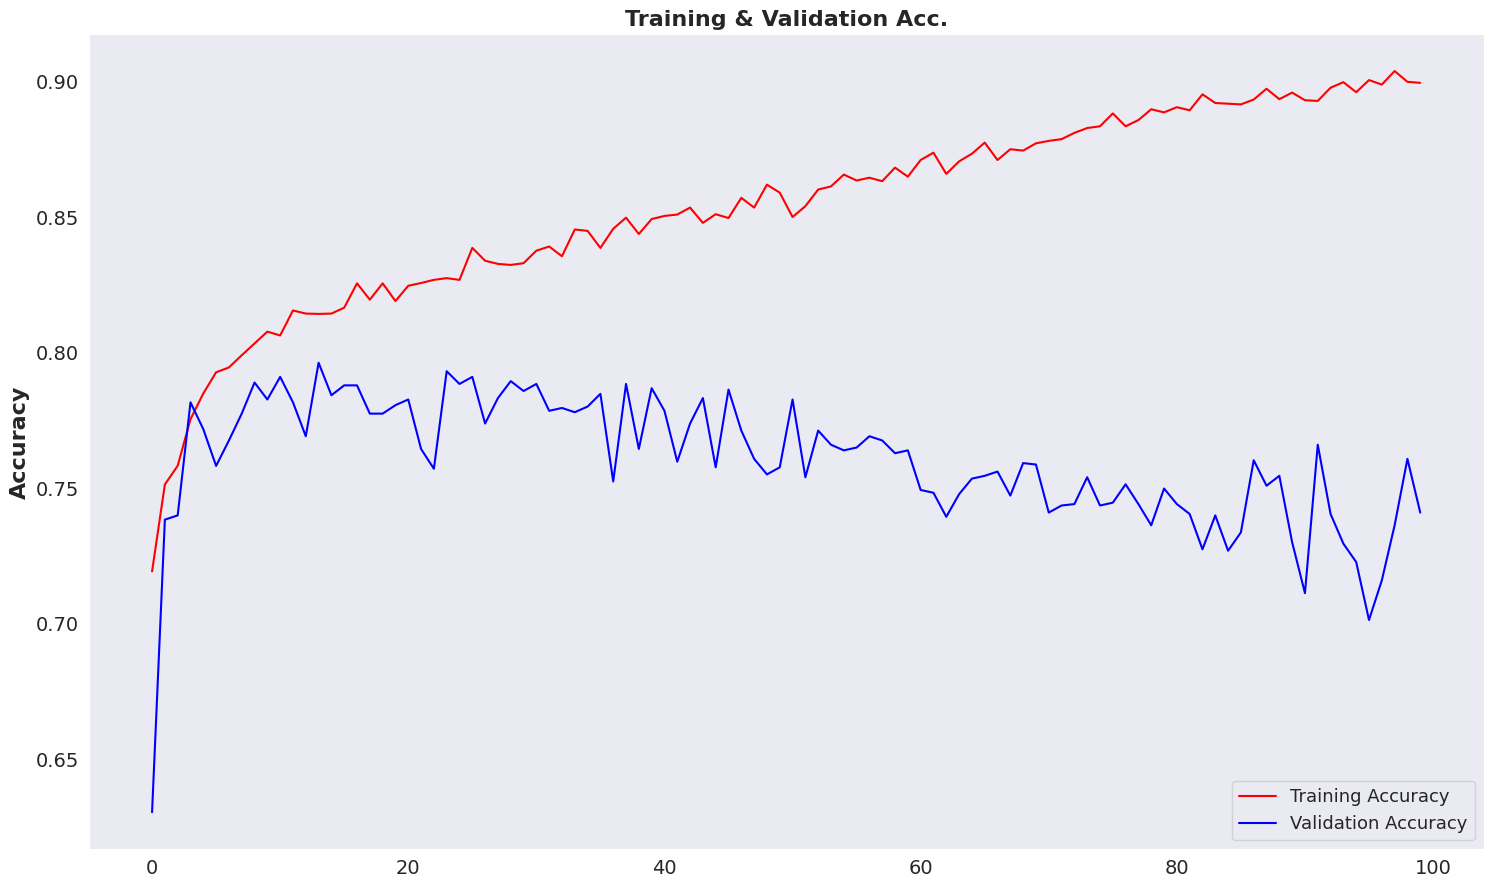

In [169]:
acc = h.history['accuracy']
val_acc = h.history['val_accuracy']

plt.figure(figsize=(18, 36))

plt.subplot(3, 1, 1)
plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('Training & Validation Acc.', fontsize=16, weight='bold')